#**Cluster Analysis - World Developement project**

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import math

In [6]:
df = pd.read_excel('/content/World_development_mesurement.xlsx',sheet_name='world_development', engine='openpyxl')

#### Step 2 . Examine the data

In [7]:
df.shape

(2704, 25)

In [8]:
df.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Country',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

In [9]:
df.index

RangeIndex(start=0, stop=2704, step=1)

#### Step 3. Descriptive statistics

In [10]:
df.describe()

,Birth Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,Health Exp % GDP,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban
count,2585.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2395.000000,1416.000000,2444.000000,2531.000000,1880.000000,2568.000000,2568.000000,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000
mean,0.022715,1.423071e+05,39.999418,94.875676,7.723684e+04,0.064170,302.068503,0.032813,0.239747,0.148103,71.159268,66.461838,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953
std,0.011338,6.159288e+05,57.318588,54.791906,2.599239e+05,0.026325,273.299686,0.029968,0.260132,0.171829,10.708262,9.390217,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897
min,0.007000,7.000000e+00,1.000000,1.000000,8.000000e+00,0.008000,12.000000,0.002000,0.000000,0.005000,39.000000,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000
25%,0.013000,1.360000e+03,13.000000,48.000000,3.737000e+03,0.046000,156.000000,0.009000,0.000000,0.080000,64.000000,61.000000,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000
50%,0.020000,8.529000e+03,26.000000,94.000000,1.433800e+04,0.061000,239.000000,0.020000,0.100000,0.120000,75.000000,69.000000,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000
75%,0.031000,5.910800e+04,45.000000,142.000000,4.185200e+04,0.079000,344.750000,0.053000,0.400000,0.173000,79.000000,73.250000,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000
max,0.053000,8.286892e+06,694.000000,189.000000,2.727728e+06,0.225000,2600.000000,0.141000,1.000000,4.965000,87.000000,88.000000,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000


Step 4. Null values count per columns

In [11]:
df.isna().sum()

,0
Birth Rate,119
Business Tax Rate,1281
CO2 Emissions,579
Country,0
Days to Start Business,986
Ease of Business,2519
Energy Usage,919
GDP,210
Health Exp % GDP,309
Health Exp/Capita,309


##### Columns with No Null Values

In [12]:
df.columns[df.notna().all()]

Index(['Country', 'Number of Records', 'Population Total'], dtype='object')

In [13]:
d1 = df.copy()
d1.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


In [14]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

#### Visualizing the null values

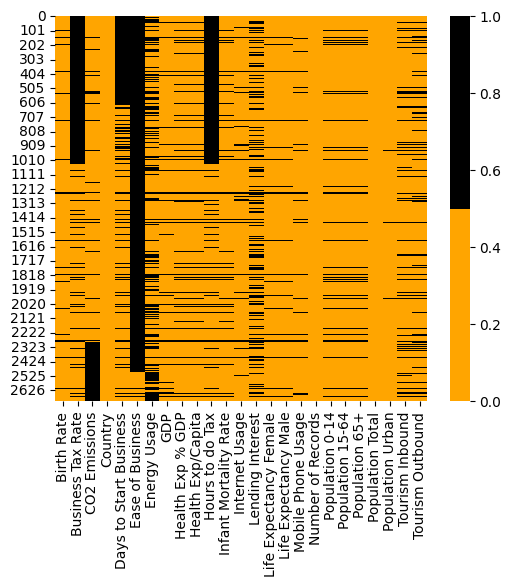

In [15]:
plt.figure(figsize=(6,5))
cols=['orange','black']
sns.heatmap(d1.isnull(),cmap=cols)
plt.show()

#### Checking for duplicates

In [16]:
d1.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2699,False
2700,False
2701,False
2702,False


In [17]:
d1[d1.duplicated()]

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound


#### conclusion - There are no duplicates

In [18]:
#d1.head()

In [19]:
d2 = d1.copy()
d2.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


### Step 4. Data Cleaning

In [20]:
# remove $ sign
currency_cols = d2.select_dtypes(include='object').columns[
    d2.select_dtypes(include='object').apply(lambda x: x.astype(str).str.contains('\$').any())
]

for col in currency_cols:
    d2[col].replace('[\$,]', '', regex=True, inplace=True)
    d2[col] = pd.to_numeric(d2[col], errors='coerce')


In [21]:
# remove % sign
percent_cols = d2.select_dtypes(include='object').columns[
    d2.select_dtypes(include='object').apply(lambda x: x.astype(str).str.contains('%').any())
]

for col in percent_cols:
    d2[col].replace('%', '', regex=True, inplace=True)
    d2[col] = pd.to_numeric(d2[col], errors='coerce')


In [22]:
d2.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,5.479006e+10,0.035,60.0,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,102000000.0,193000000.0
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,9.129595e+09,0.034,22.0,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,34000000.0,146000000.0
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,2.359122e+09,0.043,15.0,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,77000000.0,50000000.0
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,5.788312e+09,0.047,152.0,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,227000000.0,209000000.0
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,2.610959e+09,0.051,12.0,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,23000000.0,30000000.0


#### Step 5. Handling missing values

In [23]:
num_cols = d2.select_dtypes(include=[np.number]).columns
for col in num_cols:
    d2[col].fillna(d2[col].median(), inplace=True)

In [24]:
obj_cols = d2.select_dtypes(include=['object']).columns
for col in obj_cols:
    if d2[col].isnull().sum() > 0:
        d2[col].fillna(d2[col].mode()[0], inplace=True)

In [25]:
d2.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,41.0,87931.0,Algeria,26.0,94.0,26998.0,5.479006e+10,0.035,60.0,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,102000000.0,193000000.0
1,0.050,41.0,9542.0,Angola,26.0,94.0,7499.0,9.129595e+09,0.034,22.0,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,34000000.0,146000000.0
2,0.043,41.0,1617.0,Benin,26.0,94.0,1983.0,2.359122e+09,0.043,15.0,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,77000000.0,50000000.0
3,0.027,41.0,4276.0,Botswana,26.0,94.0,1836.0,5.788312e+09,0.047,152.0,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,227000000.0,209000000.0
4,0.046,41.0,1041.0,Burkina Faso,26.0,94.0,14338.0,2.610959e+09,0.051,12.0,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,23000000.0,30000000.0


### Step 6. Visualizing the data

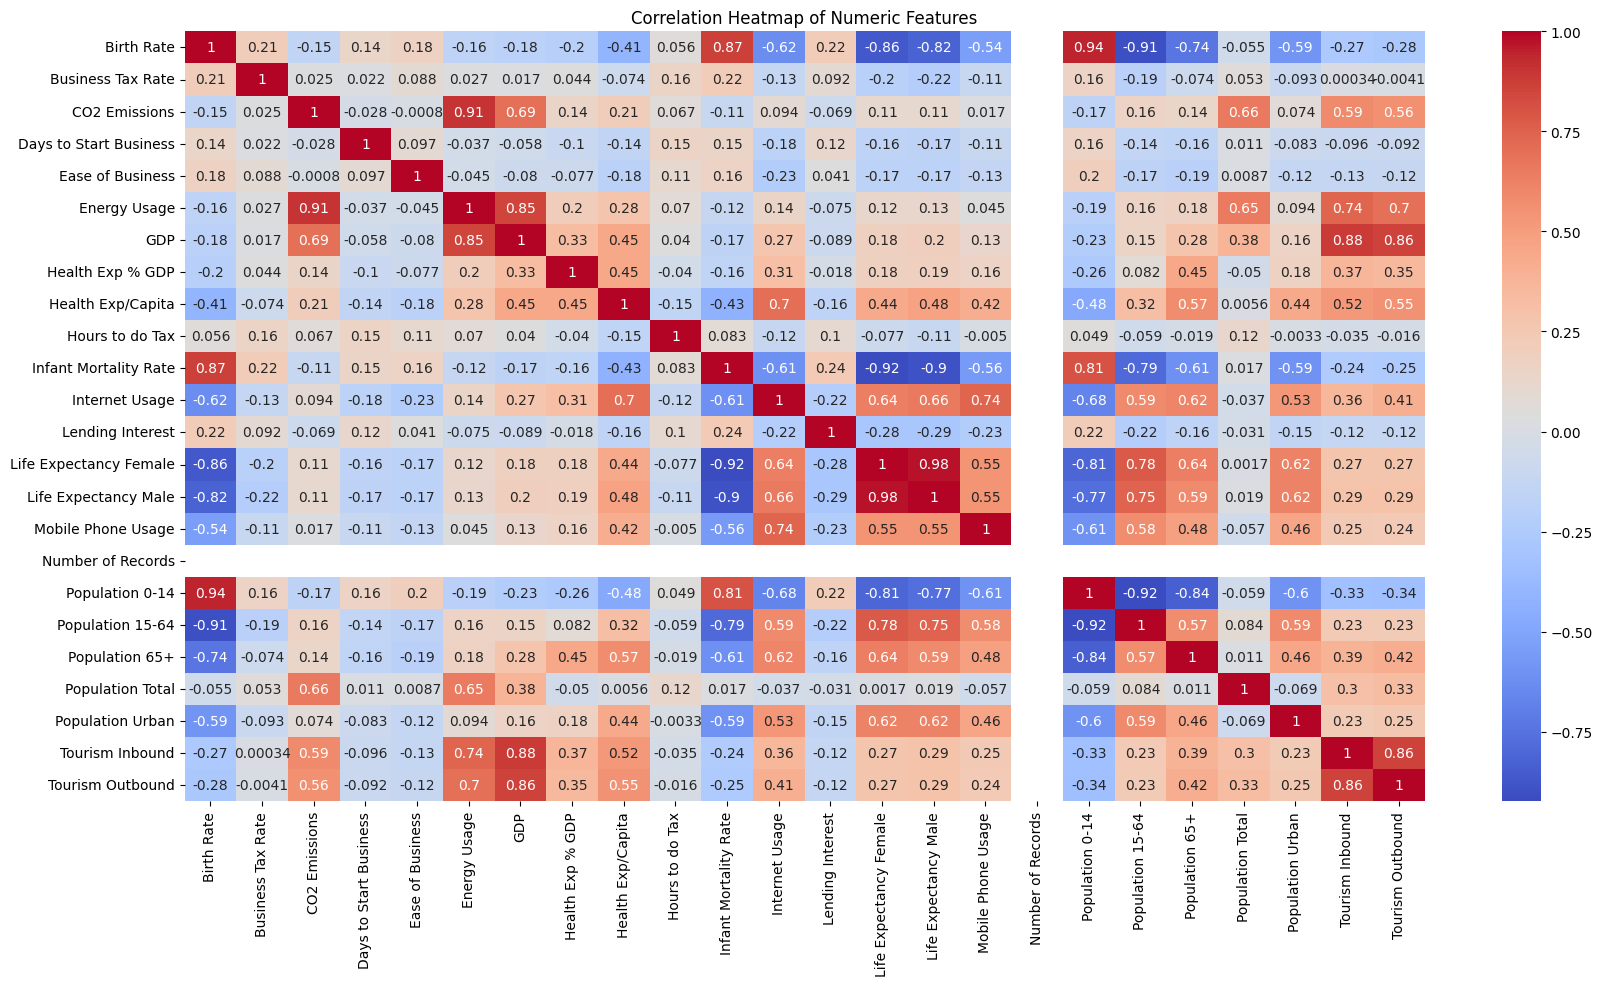

In [26]:
plt.figure(figsize=(20,10))
sns.heatmap(d2.select_dtypes(include=[np.number]).corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features', fontsize=12)
plt.show()

In [27]:
numeric_cols = d2.select_dtypes(include=["float64", "int64"]).columns

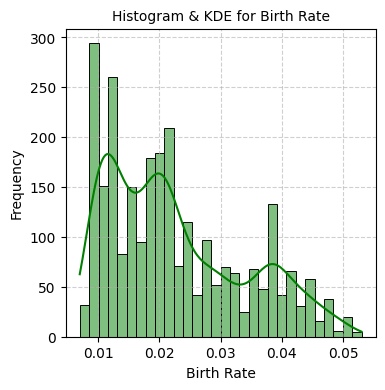

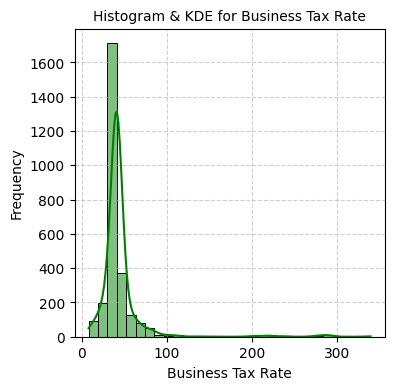

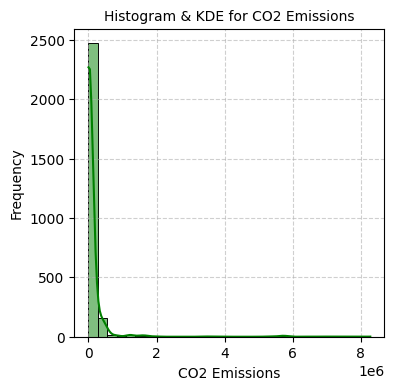

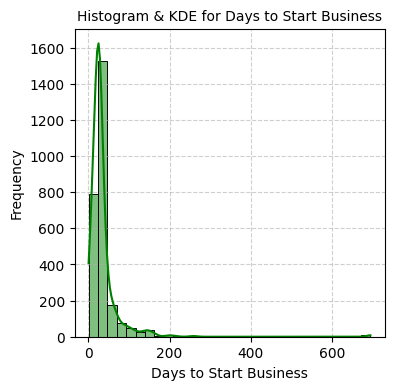

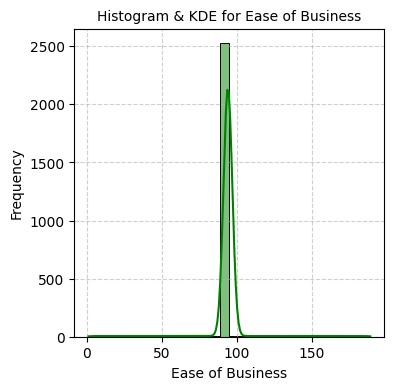

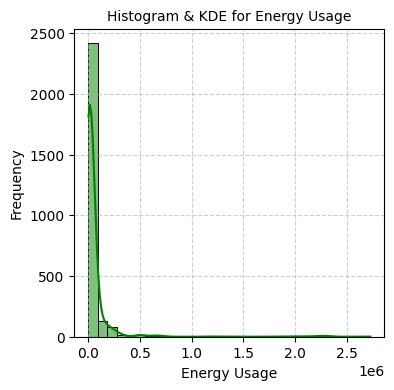

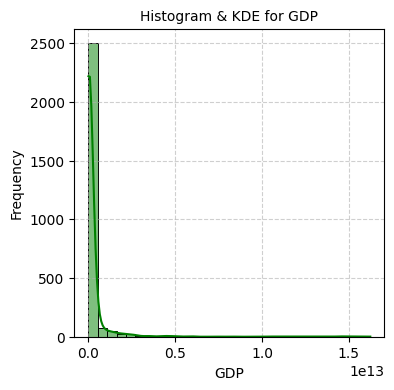

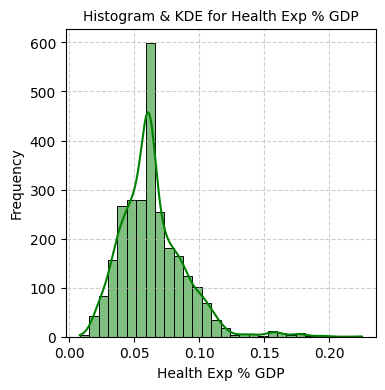

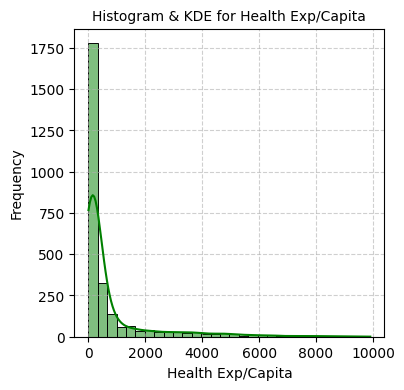

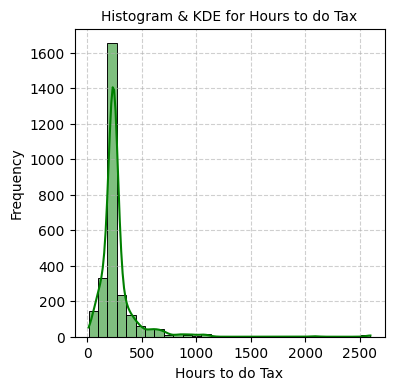

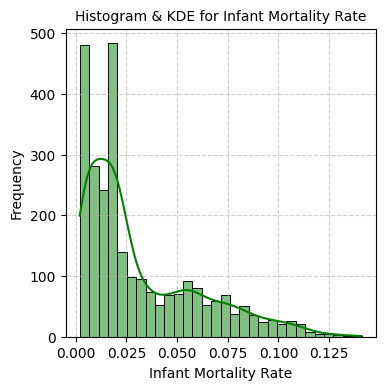

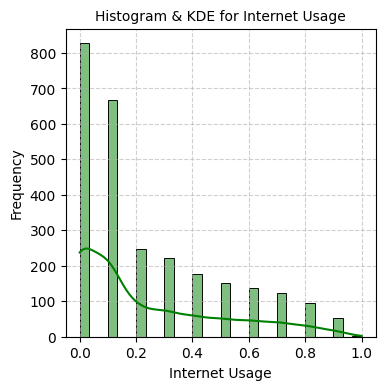

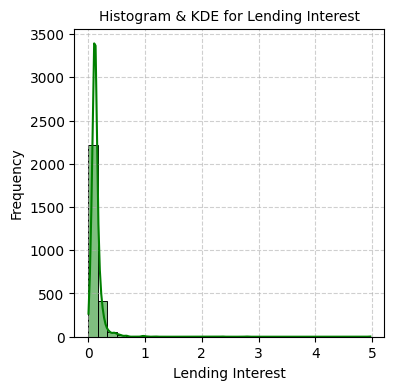

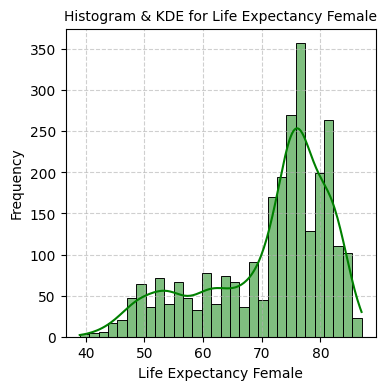

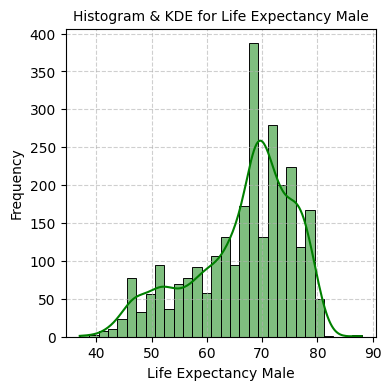

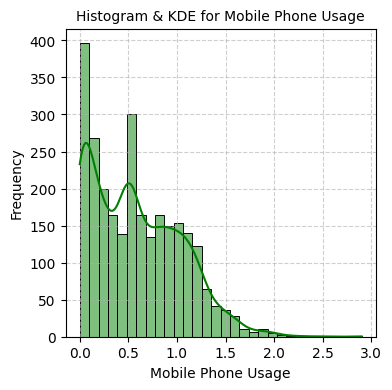

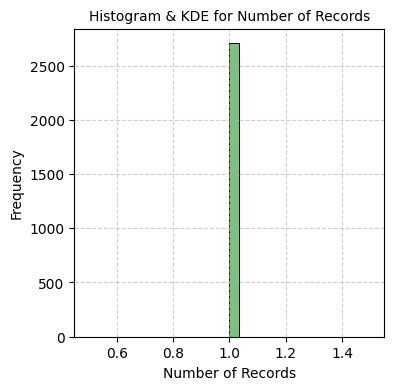

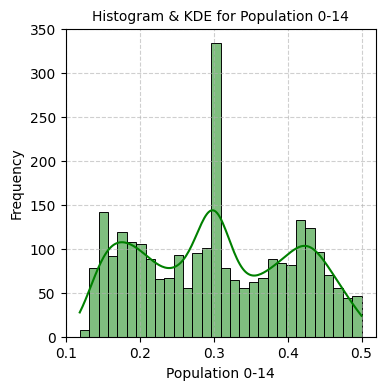

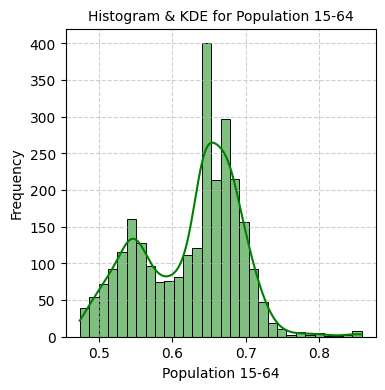

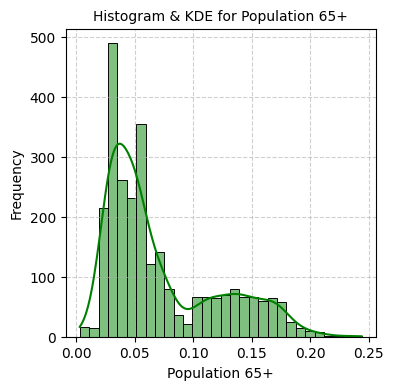

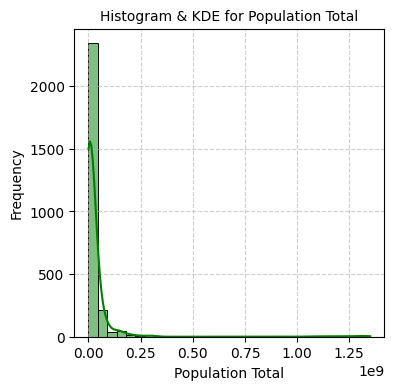

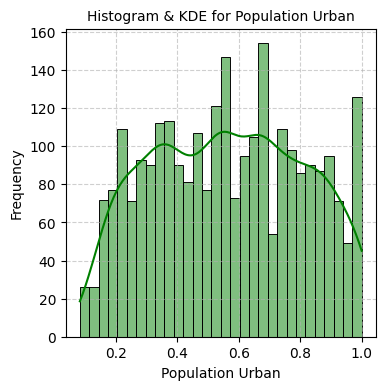

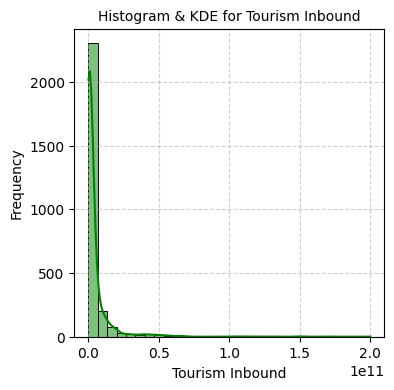

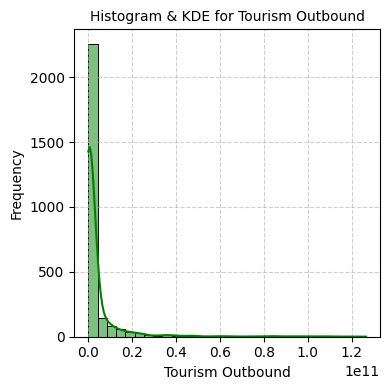

In [28]:
for col in numeric_cols:
    plt.figure(figsize=(4, 4))
    sns.histplot(d2[col].dropna(),
    kde=True, bins=30, color="Green", edgecolor="black")

    plt.title(f"Histogram & KDE for {col}", fontsize=10)
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Frequency", fontsize=10)
    plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### Bivariate Analysis

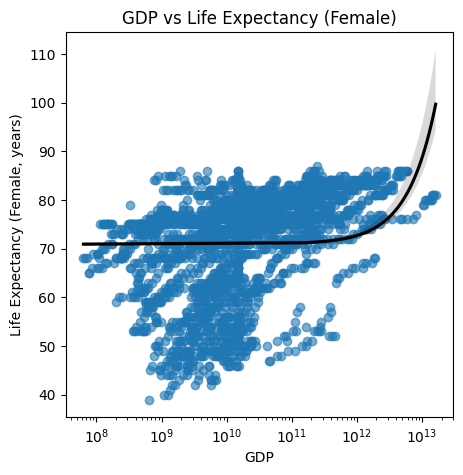

In [29]:

plt.figure(figsize=(5,5))
sns.regplot(x="GDP", y="Life Expectancy Female", data=d2,
            scatter_kws={"alpha":0.6}, line_kws={"color":"black"})
plt.xscale("log")
plt.title("GDP vs Life Expectancy (Female)")
plt.ylabel("Life Expectancy (Female, years)")
plt.show()

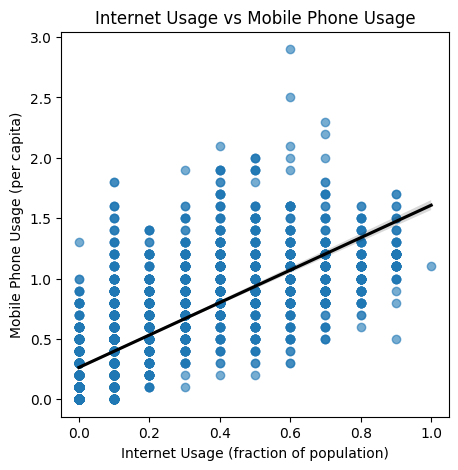

In [30]:
plt.figure(figsize=(5,5))
sns.regplot(x="Internet Usage", y="Mobile Phone Usage", data=d2,
            scatter_kws={"alpha":0.6}, line_kws={"color":"black"})
plt.title("Internet Usage vs Mobile Phone Usage")
plt.xlabel("Internet Usage (fraction of population)")
plt.ylabel("Mobile Phone Usage (per capita)")
plt.show()

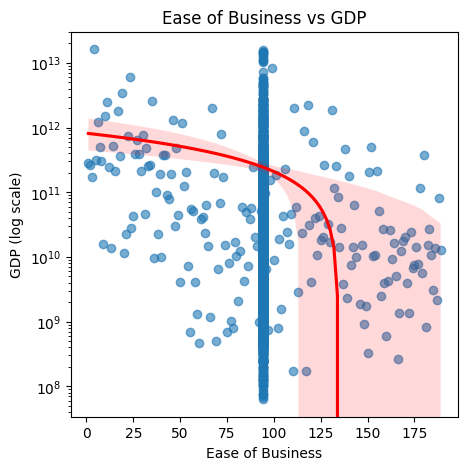

In [31]:
plt.figure(figsize=(5,5))
sns.regplot(x="Ease of Business", y="GDP", data=d2,
            scatter_kws={"alpha":0.6}, line_kws={"color":"Red"})
plt.yscale("log")
plt.title("Ease of Business vs GDP")
plt.ylabel("GDP (log scale)")
plt.show()

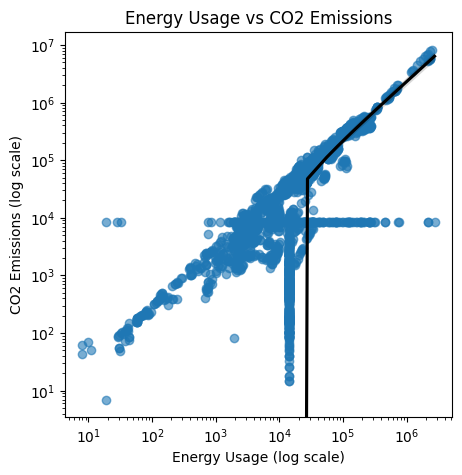

In [32]:
plt.figure(figsize=(5,5))
sns.regplot(x="Energy Usage", y="CO2 Emissions", data=d2,
            scatter_kws={"alpha":0.6}, line_kws={"color":"black"})
plt.xscale("log")
plt.yscale("log")
plt.title("Energy Usage vs CO2 Emissions")
plt.xlabel("Energy Usage (log scale)")
plt.ylabel("CO2 Emissions (log scale)")
plt.show()

### Step 7. Detecting the Outliers

In [33]:
num_cols = d2.select_dtypes(include=["int64", "float64"]).columns
num_cols

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

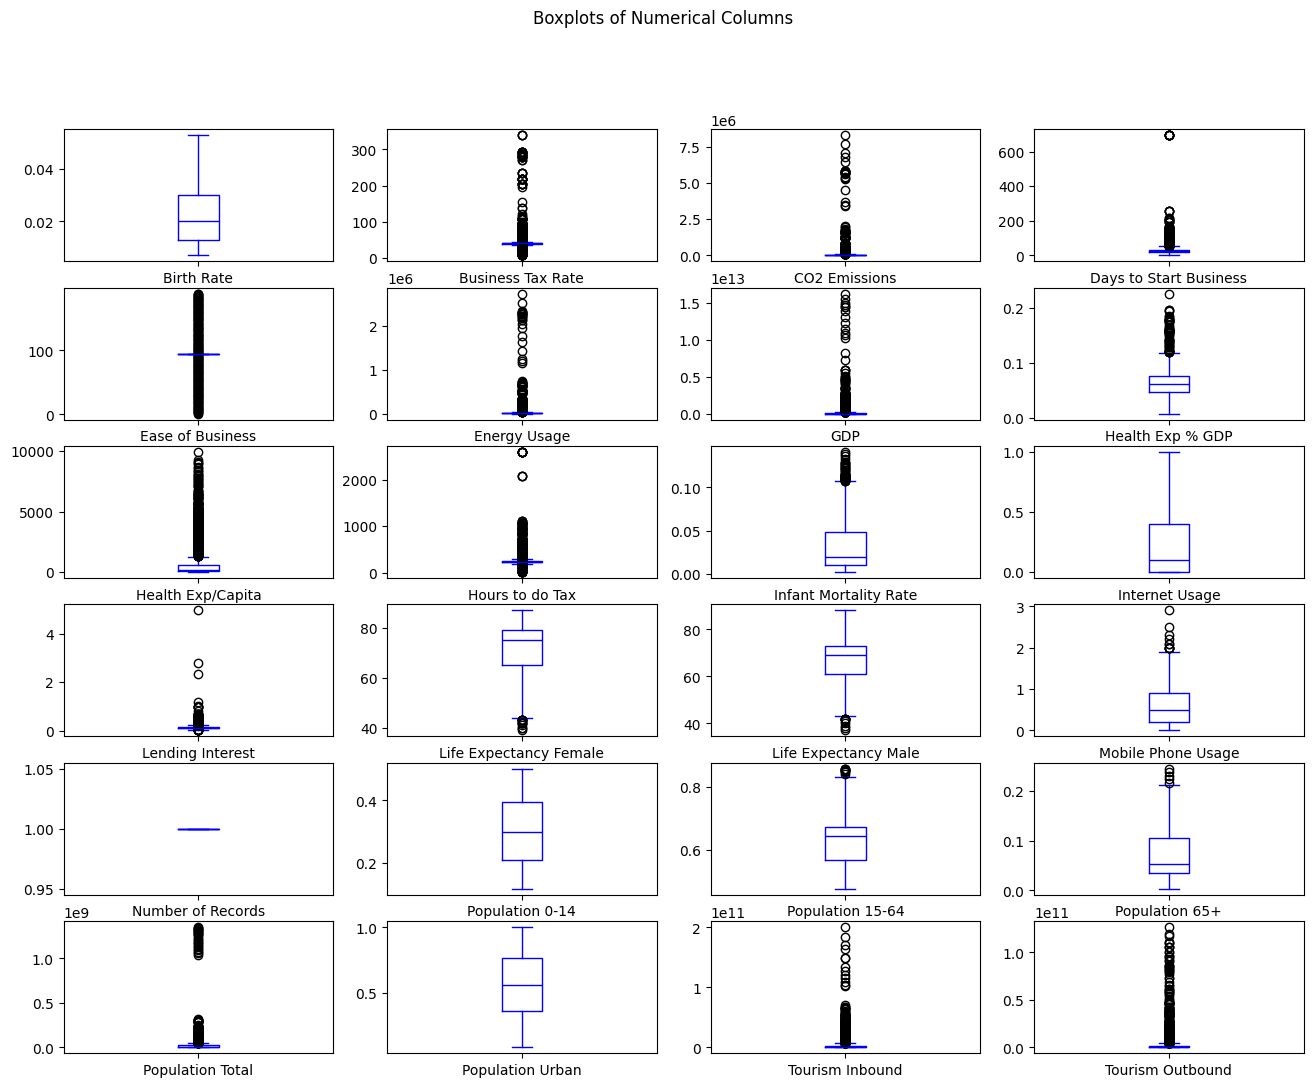

In [34]:

d2[num_cols].plot(kind='box', color ="blue",subplots=True,
                  layout=(-1, 4), figsize=(16, 12),
                  sharex=False, sharey=False)
plt.suptitle("Boxplots of Numerical Columns")
plt.show()

In [35]:
for col in num_cols:
    Q1 = d2[col].quantile(0.25)
    Q3 = d2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # Cap the outliers instead of removing rows
    d2[col] = d2[col].clip(lower, upper)

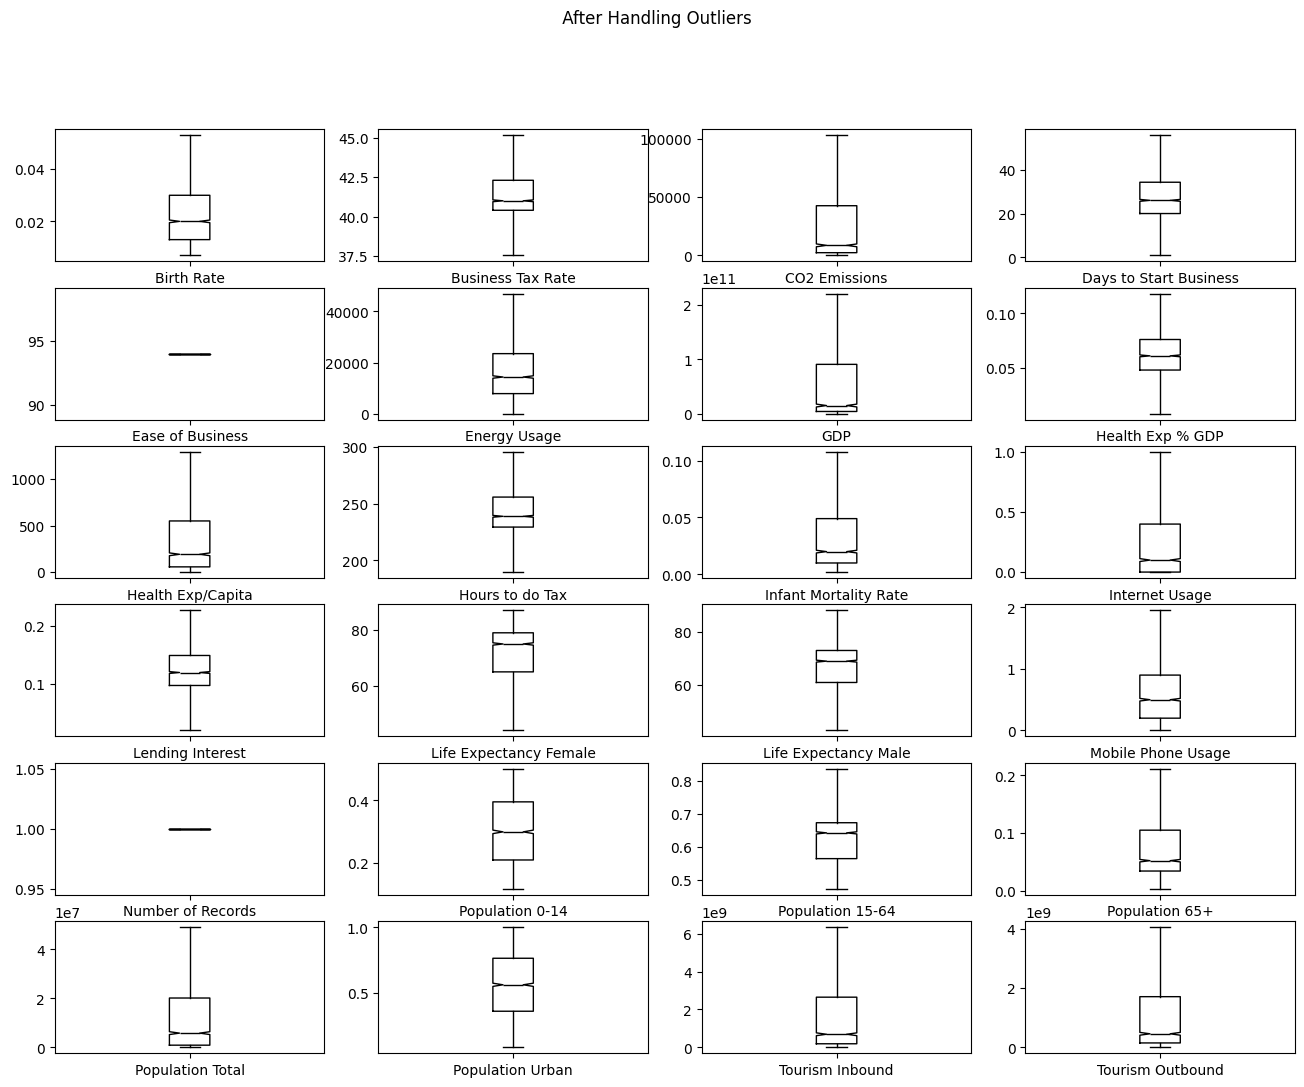

In [36]:
d2[num_cols].plot(kind='box',  color ="black",notch =True,
                  subplots=True, layout=(-1, 4),
                  figsize=(16, 12), sharex=False,
                  sharey=False)
plt.suptitle(" After Handling Outliers")
plt.show()

#### Step 8. Scaling Data

In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.cluster import KMeans ,AgglomerativeClustering,DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [38]:
d2.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,41.0,87931.0,Algeria,26.0,94.0,26998.0,5.479006e+10,0.035,60.0,...,67.0,0.0,1,0.342,0.619,0.039,31719449.0,0.599,102000000.0,193000000.0
1,0.050,41.0,9542.0,Angola,26.0,94.0,7499.0,9.129595e+09,0.034,22.0,...,44.0,0.0,1,0.476,0.499,0.025,13924930.0,0.324,34000000.0,146000000.0
2,0.043,41.0,1617.0,Benin,26.0,94.0,1983.0,2.359122e+09,0.043,15.0,...,53.0,0.0,1,0.454,0.517,0.029,6949366.0,0.383,77000000.0,50000000.0
3,0.027,41.0,4276.0,Botswana,26.0,94.0,1836.0,5.788312e+09,0.047,152.0,...,49.0,0.1,1,0.383,0.587,0.029,1755375.0,0.532,227000000.0,209000000.0
4,0.046,41.0,1041.0,Burkina Faso,26.0,94.0,14338.0,2.610959e+09,0.051,12.0,...,49.0,0.0,1,0.468,0.505,0.028,11607944.0,0.178,23000000.0,30000000.0


# **Week 2: Model Building**

In [69]:


from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import joblib


#Step 2: Examine the Data

In [70]:
print("Dataset Shape:", df.shape)
print("Dataset Columns:", df.columns.tolist())

Dataset Shape: (2704, 31)
Dataset Columns: ['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Country', 'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP', 'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax', 'Infant Mortality Rate', 'Internet Usage', 'Lending Interest', 'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage', 'Number of Records', 'Population 0-14', 'Population 15-64', 'Population 65+', 'Population Total', 'Population Urban', 'Tourism Inbound', 'Tourism Outbound', 'KMeans_Cluster', 'DBSCAN_Cluster', 'GMM_Cluster', 'KMeans_Cluster_Label', 'DBSCAN_Cluster_Label', 'Hierarchical_Cluster']


#Step 3: Preprocess the Data

In [71]:


def clean_currency(x):
    if pd.isna(x): return np.nan
    return float(str(x).replace("$", "").replace(",", "").strip()) if isinstance(x, str) else float(x)

def clean_percent(x):
    if pd.isna(x): return np.nan
    return float(str(x).replace("%", "").strip()) / 100 if isinstance(x, str) else float(x)

currency_cols = ["GDP", "Health Exp/Capita", "Tourism Inbound", "Tourism Outbound"]
for col in currency_cols:
    if col in df.columns:
        df[col] = df[col].apply(clean_currency)

if "Business Tax Rate" in df.columns:
    df["Business Tax Rate"] = df["Business Tax Rate"].apply(clean_percent)



In [72]:
# Select features for clustering
features = ["GDP", "Health Exp/Capita", "Tourism Inbound", "Tourism Outbound", "Business Tax Rate"]
X = df[features]

In [73]:
# Handle missing values with KNNImputer
imputer = KNNImputer(n_neighbors=5)
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=features)

In [74]:

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

#Step 4: K-Means Clustering

K-Means Silhouette Score: 0.7347826803631418


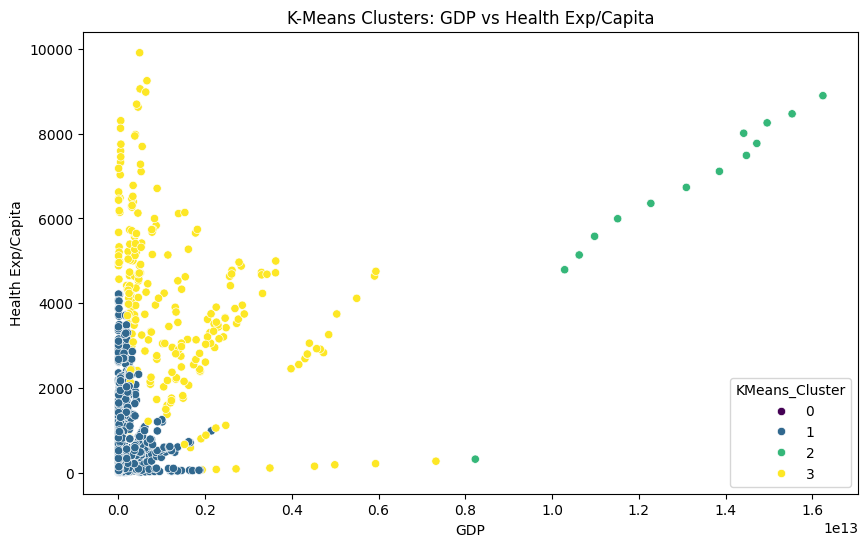

K-Means Cluster Statistics:
                          GDP  Health Exp/Capita  Tourism Inbound  \
KMeans_Cluster                                                     
0               4.942805e+09          27.285714     3.292439e+07   
1               7.753740e+10         399.361124     2.213413e+09   
2               1.294446e+13        6492.714286     1.346676e+11   
3               1.312123e+12        4121.012500     2.267012e+10   

                Tourism Outbound  Business Tax Rate  
KMeans_Cluster                                       
0                   5.914634e+07           2.563643  
1                   1.619947e+09           0.422736  
2                   1.030171e+11           0.483222  
3                   2.645514e+10           0.451208  


In [75]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=20)
kmeans_labels = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = kmeans_labels

# Evaluate K-Means with silhouette score
sil_kmeans = silhouette_score(X_scaled, kmeans_labels)
print("K-Means Silhouette Score:", sil_kmeans)

# Visualize K-Means clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_imputed['GDP'], y=X_imputed['Health Exp/Capita'], hue=df['KMeans_Cluster'], palette='viridis')
plt.title('K-Means Clusters: GDP vs Health Exp/Capita')
plt.show()

# Cluster statistics for K-Means
kmeans_cluster_stats = df.groupby('KMeans_Cluster')[features].mean()
print("K-Means Cluster Statistics:\n", kmeans_cluster_stats)

In [76]:

# Clean data
def clean_currency(x):
    if pd.isna(x): return np.nan
    return float(str(x).replace("$", "").replace(",", "").strip()) if isinstance(x, str) else float(x)
def clean_percent(x):
    if pd.isna(x): return np.nan
    return float(str(x).replace("%", "").strip()) / 100 if isinstance(x, str) else float(x)

currency_cols = ["GDP", "Health Exp/Capita", "Tourism Inbound", "Tourism Outbound"]
for col in currency_cols:
    if col in df.columns:
        df[col] = df[col].apply(clean_currency)
if "Business Tax Rate" in df.columns:
    df["Business Tax Rate"] = df["Business Tax Rate"].apply(clean_percent)

# Select features
features = ["GDP", "Health Exp/Capita", "Tourism Inbound", "Tourism Outbound", "Business Tax Rate"]
X = df[features]

# Impute missing values
imputer = KNNImputer(n_neighbors=5)
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=features)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Step 5: DBSCAN Clustering

DBSCAN Silhouette Score: 0.4443933810294761


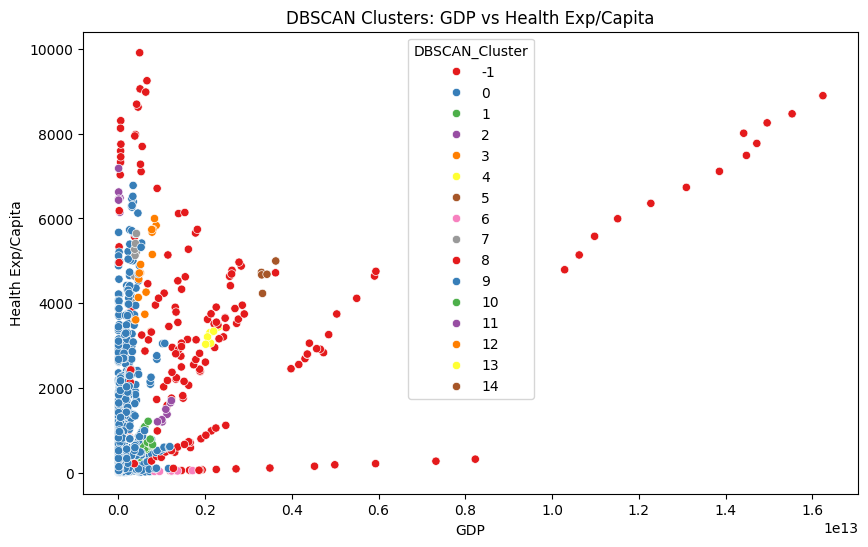

In [77]:
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add DBSCAN labels to DataFrame
df['DBSCAN_Cluster'] = dbscan_labels

# Evaluate with silhouette score (excluding noise points labeled -1)
valid_indices = dbscan_labels != -1
if len(set(dbscan_labels[valid_indices])) > 1:
    sil_dbscan = silhouette_score(X_scaled[valid_indices], dbscan_labels[valid_indices])
else:
    sil_dbscan = "Not applicable (too few clusters or too much noise)"
print("DBSCAN Silhouette Score:", sil_dbscan)

# Visualize DBSCAN clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_imputed['GDP'], y=X_imputed['Health Exp/Capita'], hue=df['DBSCAN_Cluster'], palette='Set1')
plt.title('DBSCAN Clusters: GDP vs Health Exp/Capita')
plt.show()

#Step 6: Hierarchical Clustering

In [82]:
#Hierarchical
Z = linkage(X_scaled, method='ward')
hierarchical_labels = fcluster(Z, t=4, criterion='maxclust')
df['Hierarchical_Cluster'] = hierarchical_labels
sil_hier = silhouette_score(X_scaled, hierarchical_labels)

# Step 7: Gaussian Mixture Models (GMM)

'gmm_labels' and 'GMM_Cluster' column added successfully
GMM Silhouette Score: 0.018292439633549682


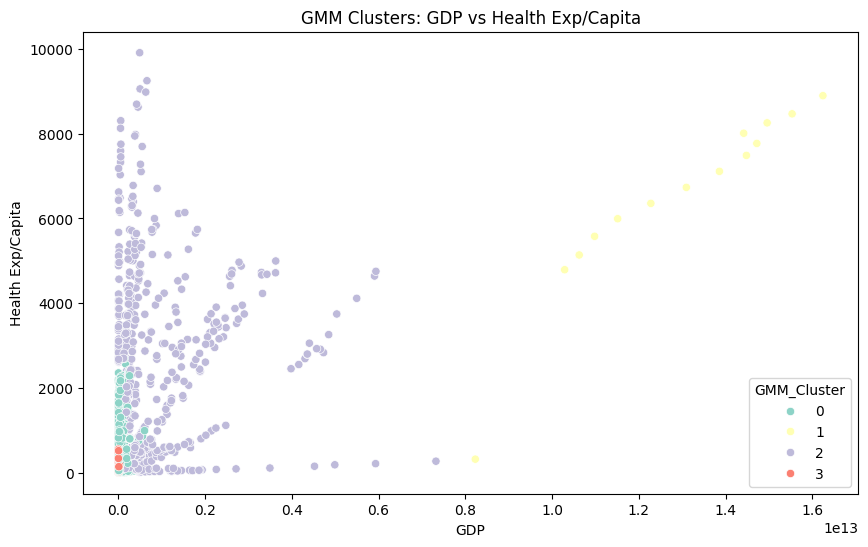

GMM Cluster Statistics:
                       GDP  Health Exp/Capita  Tourism Inbound  \
GMM_Cluster                                                     
0            5.686568e+10         463.381007     1.911350e+09   
1            1.294446e+13        6492.714286     1.346676e+11   
2            7.540985e+11        2415.734807     1.498646e+10   
3            5.367452e+09         115.880705     1.914869e+08   

             Tourism Outbound  Business Tax Rate  
GMM_Cluster                                       
0                1.206759e+09           0.435584  
1                1.030171e+11           0.483222  
2                1.527104e+10           0.411588  
3                1.265296e+08           0.604004  


In [79]:
# Corrected GMM Clustering Script
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture  # Import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Check if required variables are defined
if 'X_scaled' in globals() and 'df' in globals() and 'X_imputed' in globals():
    try:
        # Step 1: GMM Clustering
        gmm = GaussianMixture(n_components=4, random_state=42)
        gmm.fit(X_scaled)
        gmm_labels = gmm.predict(X_scaled)
        df['GMM_Cluster'] = gmm_labels
        print("'gmm_labels' and 'GMM_Cluster' column added successfully")

        # Step 2: Evaluate GMM with silhouette score
        sil_gmm = silhouette_score(X_scaled, gmm_labels)
        print("GMM Silhouette Score:", sil_gmm)

        # Step 3: Visualize GMM clusters
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=X_imputed['GDP'], y=X_imputed['Health Exp/Capita'], hue=df['GMM_Cluster'], palette='Set3')
        plt.title('GMM Clusters: GDP vs Health Exp/Capita')
        plt.show()

        # Step 4: Cluster statistics for GMM
        gmm_cluster_stats = df.groupby('GMM_Cluster')[['GDP', 'Health Exp/Capita', 'Tourism Inbound', 'Tourism Outbound', 'Business Tax Rate']].mean()
        print("GMM Cluster Statistics:\n", gmm_cluster_stats)
    except Exception as e:
        print("Error during GMM execution:", e)
else:
    print("Error: Required variables 'X_scaled', 'df', or 'X_imputed' are not defined. Please ensure preprocessing is completed.")
    print("Available variables:", globals().keys())

#Step 8: Compare Models

In [88]:
print("\nModel Comparison:")
print("K-Means Silhouette Score:", sil_kmeans, "({:.2f}%)".format(sil_kmeans * 100))
print("DBSCAN Silhouette Score:", sil_dbscan, "({:.2f}%)".format(sil_dbscan * 100) if isinstance(sil_dbscan, (int, float)) else sil_dbscan)
print("Hierarchical Silhouette Score:", sil_hier, "({:.2f}%)".format(sil_hier * 100))
print("GMM Silhouette Score:", sil_gmm, "({:.2f}%)".format(sil_gmm * 100))
best_model = max(sil_kmeans, sil_hier, sil_gmm, float('inf') if sil_dbscan == "Not applicable" else sil_dbscan)
print("Best Model (highest silhouette score):",
      "K-Means" if best_model == sil_kmeans else
      "DBSCAN" if best_model == sil_dbscan else
      "Hierarchical" if best_model == sil_hier else "GMM")


Model Comparison:
K-Means Silhouette Score: 0.7347826803631418 (73.48%)
DBSCAN Silhouette Score: 0.4443933810294761 (44.44%)
Hierarchical Silhouette Score: 0.6648172550763708 (66.48%)
GMM Silhouette Score: 0.018292439633549682 (1.83%)
Best Model (highest silhouette score): K-Means


#Step 9: Save Best Model and Results

In [84]:
# Save the best model (using K-Means as default; adjust based on best_model logic)
joblib.dump(kmeans, "kmeans_model.joblib")
joblib.dump(scaler, "scaler.joblib")
df.to_csv("World_Clusters_Labeled.csv", index=False)
print("\n Saved K-Means model, scaler, and labeled dataset as 'kmeans_model.joblib', 'scaler.joblib', and 'World_Clusters_Labeled.csv'")



 Saved K-Means model, scaler, and labeled dataset as 'kmeans_model.joblib', 'scaler.joblib', and 'World_Clusters_Labeled.csv'


In [85]:
cluster_labels = {
    0: "Developed Countries",
    1: "Developing Countries",
    2: "Underdeveloped Countries",
    3: "Emerging Small Economies"
}
df['KMeans_Cluster_Label'] = df['KMeans_Cluster'].map(cluster_labels)
df['DBSCAN_Cluster_Label'] = df['DBSCAN_Cluster'].map(cluster_labels).fillna("Noise")
df['Hierarchical_Cluster_Label'] = df['Hierarchical_Cluster'].map(cluster_labels)
df['GMM_Cluster_Label'] = df['GMM_Cluster'].map(cluster_labels)

In [86]:
# Save updated dataset with labels
df.to_csv("World_Clusters_Labeled.csv", index=False)
print(" Updated 'World_Clusters_Labeled.csv' with cluster labels")

 Updated 'World_Clusters_Labeled.csv' with cluster labels


In [87]:
%%writefile clustering_2.py

Writing clustering_2.py


In [ ]:
!python clustering_2.py